The whole code takes about 45 minutes to run on a rent 2080ti GPU server.

# 1. Data Preprocessing

#  (1) Reading the Training and the Testing Datasets

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv', header = None)
train.columns = ['label','article titile','article text']
# check the content of the training set & whether it needs random.shuffle (Here it does not need random.shuffle.)
train[:60]

,label,article titile,article text
0,2,Wizards Guard Blake Out 10-12 Week (AP),AP - Washington Wizards point guard Steve Blak...
1,4,Brief: HP acquires Synstar for \$293M,In a move designed to help it better compete i...
2,3,US Airways #39; pilots vote for 18 salary redu...,US Airways #39; pilots voted to approve a new ...
3,4,Radiation risks 'need updating',A UK panel examining radiation risks says offi...
4,1,President's fate is on the line in Venezuela,CARACAS -- Partisans on both sides are calling...
5,3,Australia #39;s Virgin Blue increases fuel sur...,SYDNEY : Australian airline Virgin Blue announ...
6,1,Chinese sub detected in Japan waters,Japanese government officials Thursday confirm...
7,1,From War-Torn to Wonderland,Honduras and other Central American countries ...
8,2,Japan celebrates Suzuki breaking record,Baseball fans across Japan Saturday honored Ic...
9,2,"On world stage, no one else compares to Els",It was two years ago when Ernie Els explained ...


In [3]:
test = pd.read_csv('data/test.csv', header = None)
test.columns = ['label','article titile','article text']
test.head()

,label,article titile,article text
0,3,Qwest: The end of the beginning,Thursday #39;s agreement between Qwest Communi...
1,1,Sadr Militiamen Still in Control of Iraq Shrine,"NAJAF, Iraq (Reuters) - Rebel Shi'ite fighter..."
2,4,Google Unveils Scholar Search Tool,"JACKSONVILLE, FL -- The online search engine l..."
3,2,Titans OT Munoz has surgery,"Knoxville, TN (Sports Network) - Tennessee Tit..."
4,4,"When outsourcing, don't forget security, exper...","When outsourcing IT operations offshore, compa..."


In [4]:
# checking missing data & len(train),len(test)
print(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
label             40000 non-null int64
article titile    40000 non-null object
article text      40000 non-null object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
label             4000 non-null int64
article titile    4000 non-null object
article text      4000 non-null object
dtypes: int64(1), object(2)
memory usage: 93.9+ KB
None None


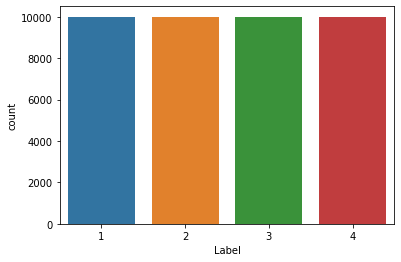

In [5]:
# check the counts of observations in each categorical bin using bars (Here we do not need data balance.)
plt.figure()
sns.countplot(train.label)
plt.xlabel('Label', size = 10)
plt.xticks(size = 10)
plt.show()

# (2）Clean Text Data

In [6]:
import string
import re
from nltk.corpus import stopwords

In [7]:
def clean_text(text):
    # replace '--' with a space
    text = text.replace('--',' ')
    # split into tokens by white space
    tokens = text.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' %re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return ' '.join(tokens)

In [8]:
train['article text'] = train['article text'].apply(lambda x: clean_text(x))
test['article text'] = test['article text'].apply(lambda x: clean_text(x))

In [9]:
# do a sanity check
list(train['article text'])

['ap washington wizards point guard steve blake miss first month season injuring ankle pickup game',
 'in move designed help better compete europe hewlettpackard said acquired synstar plc ukbased technology services firm million',
 'us airways pilots voted approve new labor agreement yesterday reduce salaries percent save airline million year',
 'uk panel examining radiation risks says official estimates dangers health may wide mark substantially',
 'caracas partisans sides calling polarized important election venezuelas history presidential recall referendum today determine course democracy could buffet world oil prices both campaigns also utterly convinced win',
 'sydney australian airline virgin blue announced sharply increasing fuel surcharge imposed may compensate rising world oil prices',
 'japanese government officials thursday confirmed chinese navy submarine intrusively entered japanese waters day earlier the submarine discovered early wednesday',
 'honduras central american c

In [10]:
train["text_len"] = train["article text"].map(lambda x: len(x.split()))
train["text_len"].describe()

count    40000.000000
mean        19.769425
std          6.086533
min          2.000000
25%         16.000000
50%         19.000000
75%         23.000000
max         87.000000
Name: text_len, dtype: float64

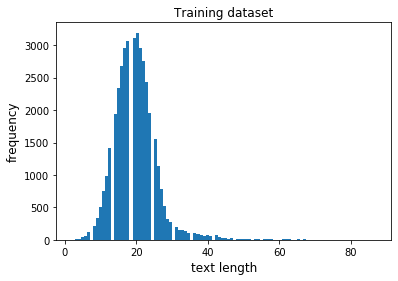

In [11]:
# show the distribution of text length using bars
plt.figure()
plt.hist(train["text_len"], bins = 100)
plt.xlabel('text length', size =12)
plt.ylabel('frequency', size =12)
plt.title('Training dataset')
plt.show()

In [12]:
# prepare clean text for text generation
train.to_csv("train_clean.csv", index = None)

# 2. Text Data Preparation（Feature Extraction)

# (1) Prepare Text Data with Tfidf 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# create the vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 1))
# fit and transform (all train_text should participate in fitting the vectorizer)
vector = vectorizer.fit(train['article text'])
train_text_t = vector.transform(train['article text'])

In [15]:
print(train_text_t.shape)
print(type(train_text_t))
print(train_text_t)

(40000, 49750)
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 48888)	0.3220854408308597
  (0, 47991)	0.18522713548905098
  (0, 41764)	0.2571127964168407
  (0, 38670)	0.18391942281240414
  (0, 32588)	0.2575958805032997
  (0, 32131)	0.35776776151376466
  (0, 27594)	0.20061010607663515
  (0, 27270)	0.2665568302303233
  (0, 21258)	0.284330672063398
  (0, 18055)	0.2541086678851914
  (0, 16735)	0.17908177169734804
  (0, 15306)	0.1487979255509633
  (0, 4734)	0.37699989332838374
  (0, 2154)	0.1447836730597351
  (0, 1898)	0.30602399310151723
  (1, 46145)	0.3600778128990295
  (1, 43685)	0.1854677042936583
  (1, 42962)	0.397186855180101
  (1, 39117)	0.1989355232761811
  (1, 37889)	0.1068226512921689
  (1, 32456)	0.259894473086641
  (1, 27855)	0.20400670084231348
  (1, 27056)	0.1628770321513468
  (1, 20778)	0.18748729796261965
  (1, 19120)	0.2589031232242174
  :	:
  (39999, 44078)	0.1542750446495645
  (39999, 38923)	0.179170051586502
  (39999, 38670)	0.1359241009918426
  (39999, 38051)	0.148992746668

In [16]:
# save the Tfidfvectorizer for the later text generation
from pickle import dump
# save the Tfidfvectorizer
dump(vector, open('Tfidfvectorizer.pkl', 'wb'))

In [17]:
X_test_t = vector.transform(test['article text'])

# (2) Prepare Text Data with Word2vec

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing .sequence import pad_sequences
from numpy import asarray
from numpy import zeros
# If your personal computer raise ModuleNotFoundError: No module named 'gensim', please install gensim first.
from gensim.models import word2vec
import logging

Using TensorFlow backend.
unable to import 'smart_open.gcs', disabling that module


# 1) Encode with Tokenizer (Prepare Input for the Deep Learning Model)

In [19]:
# fit a tokenizer
def create_tokenizer(text):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text)
    return tokenizer

# integer encode and pad documents                                                                                                                                 
def encode_text(tokenizer, max_length, text):
    # integer encode
    encoded = tokenizer.texts_to_sequences(text)
    # pad sequences
    padded = pad_sequences(encoded, maxlen = max_length, padding = 'post')
    return padded                                  
# create the tokenizer
tokenizer = create_tokenizer(train['article text'])
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)
# calculate the maximum sequence length
max_length = max([len(s.split()) for s in train['article text']])
print('Maximum length: %d' % max_length)
# encode data
train_text_w = encode_text(tokenizer, max_length, train['article text'])
print(train_text_w)

Vocabulary size: 49751
Maximum length: 87
[[    6    56  3853 ...     0     0     0]
 [   96   196   617 ...     0     0     0]
 [    4   829  1059 ...     0     0     0]
 ...
 [11548  2789   147 ...     0     0     0]
 [    4   225   154 ...     0     0     0]
 [    1   834  2174 ...     0     0     0]]


In [20]:
# save the tokenizer for the later text generation
from pickle import dump
# save the tokenizer
dump(tokenizer, open('tokenizer_w.pkl', 'wb'))

In [21]:
X_test_w = encode_text(tokenizer, max_length, test['article text'])

# 2) Word2vec (Prepare Input for Random Forest & Prepare Embedding_Vectors as Weights of the Deep Learning Model's Embedding Layer)

In [22]:
raw_sentences_train = train['article text'].tolist()
print(raw_sentences_train[:50])

['ap washington wizards point guard steve blake miss first month season injuring ankle pickup game', 'in move designed help better compete europe hewlettpackard said acquired synstar plc ukbased technology services firm million', 'us airways pilots voted approve new labor agreement yesterday reduce salaries percent save airline million year', 'uk panel examining radiation risks says official estimates dangers health may wide mark substantially', 'caracas partisans sides calling polarized important election venezuelas history presidential recall referendum today determine course democracy could buffet world oil prices both campaigns also utterly convinced win', 'sydney australian airline virgin blue announced sharply increasing fuel surcharge imposed may compensate rising world oil prices', 'japanese government officials thursday confirmed chinese navy submarine intrusively entered japanese waters day earlier the submarine discovered early wednesday', 'honduras central american countrie

In [23]:
sentences_train = [s.split() for s in raw_sentences_train]
print(sentences_train[:100])

[['ap', 'washington', 'wizards', 'point', 'guard', 'steve', 'blake', 'miss', 'first', 'month', 'season', 'injuring', 'ankle', 'pickup', 'game'], ['in', 'move', 'designed', 'help', 'better', 'compete', 'europe', 'hewlettpackard', 'said', 'acquired', 'synstar', 'plc', 'ukbased', 'technology', 'services', 'firm', 'million'], ['us', 'airways', 'pilots', 'voted', 'approve', 'new', 'labor', 'agreement', 'yesterday', 'reduce', 'salaries', 'percent', 'save', 'airline', 'million', 'year'], ['uk', 'panel', 'examining', 'radiation', 'risks', 'says', 'official', 'estimates', 'dangers', 'health', 'may', 'wide', 'mark', 'substantially'], ['caracas', 'partisans', 'sides', 'calling', 'polarized', 'important', 'election', 'venezuelas', 'history', 'presidential', 'recall', 'referendum', 'today', 'determine', 'course', 'democracy', 'could', 'buffet', 'world', 'oil', 'prices', 'both', 'campaigns', 'also', 'utterly', 'convinced', 'win'], ['sydney', 'australian', 'airline', 'virgin', 'blue', 'announced', 's

In [24]:


logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# train word2vec model
model_w = word2vec.Word2Vec(sentences_train, size=100, min_count=5)
# summarize vocabulary size in model
words_w = list(model_w.wv.vocab)
print('Vocabulary size: %d' % len(words_w))

2020-04-18 16:43:25,766 : INFO : collecting all words and their counts
2020-04-18 16:43:25,767 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-18 16:43:25,803 : INFO : PROGRESS: at sentence #10000, processed 198319 words, keeping 25277 word types
2020-04-18 16:43:25,838 : INFO : PROGRESS: at sentence #20000, processed 396502 words, keeping 35773 word types
2020-04-18 16:43:25,870 : INFO : PROGRESS: at sentence #30000, processed 593117 words, keeping 43322 word types
2020-04-18 16:43:25,907 : INFO : collected 49750 word types from a corpus of 790777 raw words and 40000 sentences
2020-04-18 16:43:25,908 : INFO : Loading a fresh vocabulary
2020-04-18 16:43:26,039 : INFO : effective_min_count=5 retains 14168 unique words (28% of original 49750, drops 35582)
2020-04-18 16:43:26,039 : INFO : effective_min_count=5 leaves 734912 word corpus (92% of original 790777, drops 55865)
2020-04-18 16:43:26,083 : INFO : deleting the raw counts dictionary of 49750 items

Vocabulary size: 14168


In [25]:
# save model in ASCII (word2vec) format
filename = 'embedding_word2vec.txt'
model_w.wv.save_word2vec_format(filename, binary=False)

2020-04-18 16:43:30,740 : INFO : storing 14168x100 projection weights into embedding_word2vec.txt


In [26]:
# load embedding as a dict
def load_embedding(filename):
    # load embedding into memory, skip first line
    file = open(filename,'r')
    lines = file.readlines()[1:]
    file.close()
    # create a map of words to vectors
    embedding = dict()
    for line in lines:
        parts = line.split()
        # key is string word, value is numpy array for vector
        embedding[parts[0]] = asarray(parts[1:], dtype='float32')
    return embedding

# load embedding from file
raw_embedding = load_embedding('embedding_word2vec.txt')
# do a sanity check
print(raw_embedding['the'])

[-0.50055367  0.3666049   0.46512377 -0.02995934 -0.3318465  -0.15297659
 -0.2659903   1.1393567   0.27480078 -0.14749096  0.46063802 -0.24181454
 -0.6928203   0.03118946 -0.68905073 -0.0752959  -0.60179687 -0.6808167
  0.4576899  -0.64664584  0.04693343  0.8003021  -0.21068618  1.0950933
 -0.32568493  0.20112665  0.78087     0.3792021   0.03418208 -0.4663937
  1.0789211  -0.42674634 -0.09344526  0.17240517  1.3546994  -0.7780857
  0.9211514  -0.345862    0.5779184   0.02714556  0.16449429 -1.0193262
  0.26267177 -0.53795797 -0.46716133 -0.21151303 -0.44840908  0.7584774
  0.07438437 -0.69963276  0.7495681  -0.78315103  0.30753863  0.40143472
 -0.8463126  -0.87697965  0.21873139  0.18975613 -0.44958213 -0.43594489
 -1.2904826  -0.73502725 -0.00173552  1.1087177   0.7160015  -0.02486867
  0.15866336 -0.09985847 -1.0222024  -0.1446278  -0.22922714 -0.2788021
 -0.3301258   0.38363647 -0.7822534  -0.33606672 -0.40352586 -0.28710285
  0.47481206 -0.10683256 -0.76244175  0.13022062  0.327365

In [27]:
# prepare word2vec for random forest

train_text_w_RF = []
X_test_w_RF = []

def RF_input_matrix(embedding, sentences, text):
    for sentence in sentences:
        vector = zeros(100)
        word_num = 0
        for word in sentence:
            if word in embedding.keys():
                vector += embedding.get(word)
                word_num += 1
        if word_num > 0:
            vector = vector / word_num
        text.append(vector)
    return text


train_text_w_RF = RF_input_matrix(raw_embedding, sentences_train, train_text_w_RF)

raw_sentences_test = test['article text'].tolist()
sentences_test= [s.split() for s in raw_sentences_test]
X_test_w_RF = RF_input_matrix(raw_embedding, sentences_test, X_test_w_RF)

# do a sanity check
print(train_text_w_RF[:10])

[array([ 0.28269249, -0.13404508,  0.40280411, -0.20828675, -0.00327456,
        0.5321082 ,  0.3699263 ,  0.14324866, -0.38157044,  0.21569837,
        0.18895329, -0.00924212,  0.14281964, -0.05456681,  0.39031835,
        0.22980973, -0.55158773,  0.22134746, -0.3631623 , -0.65762821,
        0.10936365,  0.7083906 ,  0.04764039, -0.06087444,  0.0029047 ,
        0.36157814,  0.33520557,  0.04307981,  0.60778941, -0.29397062,
       -0.04828943, -0.54508107, -0.03663699,  0.63874502,  0.75118808,
       -0.18105729, -0.38030357, -0.3885778 ,  0.33614441, -0.07620196,
        0.04122707,  0.74477985, -0.22951136, -0.23229342,  0.21696892,
       -0.21373698, -0.331817  ,  0.34527258, -0.06025707, -0.30459806,
        0.03297702, -0.49275631, -0.27654889, -0.04914555, -0.51583089,
       -0.00599864, -0.17318872,  0.43466362, -0.10649324, -0.07363941,
       -0.79834421, -0.67322175,  0.12329046,  0.09458123, -0.10921135,
        0.10328527,  0.34323827, -0.12008963, -0.80303951, -0.0

In [28]:
# prepare word2vec for the deep learning model




# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab, vocab_size):
    # define weight matrix dimensions with all 0
    weight_matrix = zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        embedding_vector = embedding.get(word)
        if embedding_vector is not None:
            weight_matrix[i] = embedding_vector
    return weight_matrix


# get vectors in the right order. vocab_size = len(tokenizer.word_index) + 1 was defined above.
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index, vocab_size)
# do a sanity check
pd.DataFrame(embedding_vectors)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.500554,0.366605,0.465124,-0.029959,-0.331847,-0.152977,-0.265990,1.139357,0.274801,-0.147491,...,0.750396,-0.800082,-0.350218,0.114742,-0.762853,-0.473352,-0.506882,-0.481767,-0.311915,0.848941
2,0.023091,0.347684,2.160541,0.413702,1.167261,-0.046568,1.129993,-0.540587,0.309240,-1.096298,...,-0.181062,0.019054,0.187391,0.409127,0.448931,0.665012,-0.893119,-0.917534,-0.273463,-0.528814
3,1.276698,-1.742334,0.184628,1.155431,0.092625,-0.059228,0.216021,1.541625,-0.384224,-1.017697,...,1.387728,0.033509,-1.090336,-0.320322,-0.599739,-0.495288,0.516272,-1.169693,0.348020,0.632548
4,-0.372234,0.462172,1.083369,0.453856,0.730952,-0.212748,-0.880524,0.173341,0.322810,-0.573779,...,0.643976,-0.367109,0.580967,0.269638,-0.931753,0.846251,-0.460216,0.118641,0.039737,0.128704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 3. Split Text Data into Input and Output

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Text Data Prepared with Tfidf 
X_train_t, X_valid_t = train_test_split(train_text_t, test_size = 0.1, random_state = 42)

In [48]:
# Text Data Prepared with Word2vec (for Random Forest)
X_train_w_RF, X_valid_w_RF = train_test_split(train_text_w_RF, test_size = 0.1, random_state = 42)

In [32]:
# Text Data Prepared with Word2vec (for the deep learning model)
X_train_w, X_valid_w = train_test_split(train_text_w, test_size = 0.1, random_state = 42)

In [33]:
y_train, y_valid = train_test_split(train["label"], test_size = 0.1, random_state = 42)
# do a sanity check
y_valid

32823    1
16298    2
28505    1
6689     2
26893    1
        ..
19536    4
13332    3
18523    1
14835    2
8445     1
Name: label, Length: 4000, dtype: int64

In [34]:
y_test = test["label"]

# 4. Train a Standard Machine Learning model

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import learning_curve
import pandas as pd
from pickle import dump
import time

#  Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
def clfRF(X, y):
    params = {
            "n_estimators" : [50,100,120,150,180,300],  
            "max_depth" : [10,30,50],
            "min_samples_leaf" : [2,4,6,8,10]}
    classifier = GridSearchCV(estimator = RandomForestClassifier(random_state=90),
                              param_grid = params, cv = 5,n_jobs = -1, scoring = "accuracy")
    classifier.fit(X, y)
    return classifier

In [38]:
def plot_learningcurve(classifier, X, y, plt_titile):
    # check whether there is overfitting or underfitting by learning_curve
    # choose five kinds of fraction of the maximum size of the training set: np.linspace(0.1,1.0,5)
    train_size, train_score, test_score = learning_curve(classifier.best_estimator_, X, y, cv=5, train_sizes=np.linspace(0.1,1.0,5))
    train_scores_mean = np.mean(train_score, axis=1)
    train_scores_std = np.std(train_score, axis=1)
    test_scores_mean = np.mean(test_score, axis=1)
    test_scores_std = np.std(test_score, axis=1)
    plt.fill_between(train_size, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_size, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_size, train_scores_mean,'o--', color="r",label="Training score")
    plt.plot(train_size, test_scores_mean,'o-', color="g",label="Testing score")
    plt.grid()
    plt.title(plt_titile)
    plt.legend(loc="best")
    return plt.show()

# 1) Using Text Data Prepared with Tfidf

In [39]:
start_time_RF_t =time.time()

clfRF_t = clfRF(X_train_t, y_train)

trainingtime = pd.DataFrame(columns = ["Classifier", "Training Time(Seconds)"])
trainingtime.loc[0] = ["Random Forest(with Tfidf)", round((time.time()-start_time_RF_t), 2)] 

In [40]:
print(clfRF_t.best_params_)
print(clfRF_t.cv_results_['mean_test_score'])
print(clfRF_t.best_score_)

{'max_depth': 50, 'min_samples_leaf': 2, 'n_estimators': 180}
[0.77463889 0.79544444 0.802      0.80672222 0.80922222 0.81494444
 0.77322222 0.79361111 0.79972222 0.80522222 0.80891667 0.81388889
 0.77247222 0.793      0.79952778 0.80488889 0.80744444 0.81261111
 0.77230556 0.79197222 0.79880556 0.80394444 0.80638889 0.81197222
 0.77188889 0.79172222 0.79788889 0.80347222 0.80625    0.81152778
 0.81991667 0.82733333 0.82913889 0.83008333 0.831      0.83344444
 0.81575    0.82352778 0.82463889 0.82622222 0.82747222 0.82863889
 0.81361111 0.82083333 0.82308333 0.82377778 0.82494444 0.82686111
 0.81219444 0.82083333 0.82219444 0.82286111 0.82458333 0.82588889
 0.81144444 0.81991667 0.82169444 0.82241667 0.82402778 0.82575
 0.82969444 0.83533333 0.83744444 0.83791667 0.83936111 0.83919444
 0.82405556 0.83011111 0.83052778 0.83161111 0.83169444 0.83438889
 0.82244444 0.82855556 0.82972222 0.82969444 0.83027778 0.83202778
 0.82122222 0.82691667 0.82719444 0.82777778 0.82875    0.83055556
 0.

In [41]:
# show the accuracy score on the validation dataset
accuracy_score(y_valid, clfRF_t.predict(X_valid_t))

0.8425

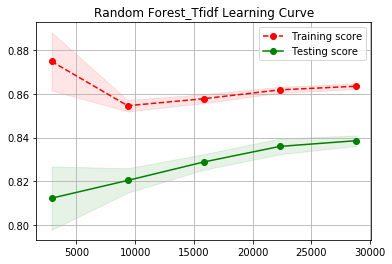

In [42]:
plot_learningcurve(clfRF_t, X_train_t, y_train, 'Random Forest_Tfidf Learning Curve')

In [43]:
# show the accuracy score on the testing dataset
acc_t = accuracy_score(y_test, clfRF_t.predict(X_test_t)) * 100

print('Testing Accuracy: %0.2f%%' % acc_t)

testing_acc = pd.DataFrame(columns = ["Classifier", "Testing accuracy(percent)"])
testing_acc.loc[0] = ["Random Forest(with Tfidf)", acc_t] 

Testing Accuracy: 83.80%


In [44]:
# save the best classifier
dump(clfRF_t.best_estimator_, open('model_clfRF_t.pkl', 'wb'))   

# 2) Using Text Data Prepared with Word2vec

In [45]:
start_time_RF_w =time.time()

clfRF_w = clfRF(X_train_w_RF, y_train)

trainingtime.loc[1] = ["Random Forest(with Word2vec)", round((time.time()-start_time_RF_w), 2)] 

In [46]:
print(clfRF_w.best_params_)
print(clfRF_w.cv_results_['mean_test_score'])
print(clfRF_w.best_score_)

{'max_depth': 30, 'min_samples_leaf': 2, 'n_estimators': 180}
[0.83555556 0.83622222 0.83641667 0.83627778 0.83625    0.83683333
 0.83655556 0.83663889 0.83702778 0.83680556 0.83683333 0.83719444
 0.83558333 0.83586111 0.83633333 0.83555556 0.83597222 0.83633333
 0.83461111 0.836      0.83644444 0.83644444 0.836      0.83638889
 0.83366667 0.83516667 0.83502778 0.83530556 0.83577778 0.83569444
 0.83780556 0.84066667 0.8405     0.84041667 0.84108333 0.84086111
 0.83855556 0.83941667 0.83980556 0.84030556 0.84022222 0.84030556
 0.83808333 0.83769444 0.83811111 0.83866667 0.83863889 0.83952778
 0.83722222 0.83783333 0.83841667 0.838      0.83866667 0.83891667
 0.83669444 0.83738889 0.8375     0.83763889 0.83802778 0.83838889
 0.838      0.84008333 0.84069444 0.84033333 0.84052778 0.84075
 0.83713889 0.83952778 0.83933333 0.83983333 0.84033333 0.84061111
 0.83819444 0.83855556 0.83902778 0.83958333 0.839      0.83952778
 0.83772222 0.83775    0.83833333 0.83802778 0.8385     0.83858333
 0.

In [49]:
# show the accuracy score on the validation dataset
accuracy_score(y_valid, clfRF_w.predict(X_valid_w_RF))

0.843

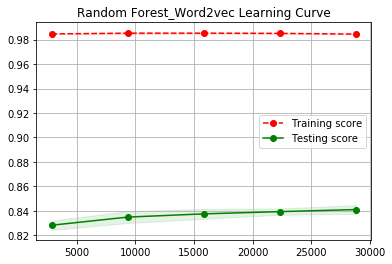

In [50]:
plot_learningcurve(clfRF_w, X_train_w_RF, y_train, 'Random Forest_Word2vec Learning Curve')

In [51]:
# show the accuracy score on the testing dataset
acc_w = accuracy_score(y_test, clfRF_w.predict(X_test_w_RF)) * 100
print('Test Accuracy: %0.2f%%' % acc_w)

testing_acc.loc[1] = ["Random Forest(with Word2vec)", acc_w]  

Test Accuracy: 84.17%


In [52]:
# save this classifier
dump(clfRF_w.best_estimator_, open('model_clfRF_w.pkl', 'wb'))   

# 5. Train a Deep Learning Model

In [53]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [54]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

In [55]:
from sklearn import preprocessing
def le_transform(y):
    le = preprocessing.LabelEncoder()
    # fit a Label Encoder
    le.fit(y)
    # transform with LabelEncoder
    y_le = le.transform(y)
    return y_le
y_train_le = le_transform(y_train)
y_valid_le = le_transform(y_valid)
y_test_le = le_transform(y_test)

In [56]:
from keras.utils import to_categorical

In [57]:
y_train_dl = to_categorical(y_train_le)
y_valid_dl = to_categorical(y_valid_le)
y_test_dl = to_categorical(y_test_le)
# do a sanity check
y_train_dl

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

# CNN + LSTM

微调Embedding学习率。
训练过程中，验证集得分或loss变差，重新加载上一轮的模型，并降学习率降半。

In [58]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model

In [59]:
def define_model(vocab_size, max_length):
    model = Sequential()
    # use Pre-trained Embedding (Word2vec)
    model.add(Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=False))
    model.add(Dropout(0.2))
    model.add(Conv1D(32, 6, activation='relu'))
    model.add(MaxPooling1D())
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model_dl.png', show_shapes=True)
    return model


In [60]:
# train the DL model (CNN + LSTM)
model = define_model(vocab_size, max_length)

start_time_dl =time.time()

history = model.fit(X_train_w, y_train_dl, epochs = 10, verbose = 2, validation_data=(X_valid_w,y_valid_dl))

trainingtime.loc[2] = ["Deep Learning Model", round((time.time()-start_time_dl), 2)] 

model.save('model_dl.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 87, 100)           4975100   
_________________________________________________________________
dropout_1 (Dropout)          (None, 87, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 82, 32)            19232     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 32)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 41, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 36000 samples, validate on 4000 samples
Epoch 1/10
 - 35s - loss: 0.7242 - accuracy: 0.6500 - val_loss: 0.5211 - val_accuracy: 0.8092
Epoch 2/10
 - 33s - loss: 0.4210 - accuracy: 0.8579 - val_loss: 0.4002 - val_accuracy: 0.8652
Epoch 3/10
 - 33s - loss: 0.3119 - accuracy: 0.8980 - val_loss: 0.3635 - val_accuracy: 0.8850
Epoch 4/10
 - 33s - loss: 0.2419 - accuracy: 0.9245 - val_loss: 0.3607 - val_accuracy: 0.8870
Epoch 5/10
 - 33s - loss: 0.1891 - accuracy: 0.9425 - val_loss: 0.3638 - val_accuracy: 0.8742
Epoch 6/10
 - 33s - loss: 0.1515 - accuracy: 0.9551 - val_loss: 0.3825 - val_accuracy: 0.8860
Epoch 7/10
 - 33s - loss: 0.1277 - accuracy: 0.9617 - val_loss: 0.4047 - val_accuracy: 0.8910
Epoch 8/10
 - 33s - loss: 0.1053 - accuracy: 0.9696 - val_loss: 0.4226 - val_accuracy: 0.8913
Epoch 9/10
 - 33s - loss: 0.0867 - accuracy: 0.9742 - val_loss: 0.4184 - val_accuracy: 0.8842
Epoch 10/10
 - 33s - loss: 0.0723 - accuracy: 0.9792 - val_loss: 0.4475 - val_accuracy: 0.8823


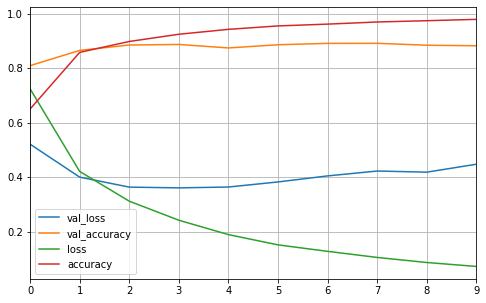

In [61]:
# show the learning curve
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [62]:
# evaluate the DL model

# load the model
model = load_model('model_dl.h5')

#
from keras import backend as K
K.set_learning_phase(0)
def evaluate_model(X,y):
    _, acc = model.evaluate(X, y, verbose = 0)
    return acc

# evaluate model on training dataset
print('Train Accuracy: %0.2f%%' % (evaluate_model(X_train_w, y_train_dl)*100))
print('Valid Accuracy: %0.2f%%' % (evaluate_model(X_valid_w, y_valid_dl)*100))

acc_dl = evaluate_model(X_test_w, y_test_dl) * 100
print('Test Accuracy: %0.2f%%' % acc_dl)
testing_acc.loc[2] = ["Deep Learning Model", acc_dl]  

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train Accuracy: 98.77%
Valid Accuracy: 88.23%
Test Accuracy: 88.17%


#  6. Compare the Performance and Training Time Results

In [63]:
trainingtime = trainingtime.sort_values(by=['Training Time(Seconds)'])
trainingtime.index = trainingtime.index + 1
trainingtime

,Classifier,Training Time(Seconds)
3,Deep Learning Model,331.36
1,Random Forest(with Tfidf),377.97
2,Random Forest(with Word2vec),962.47


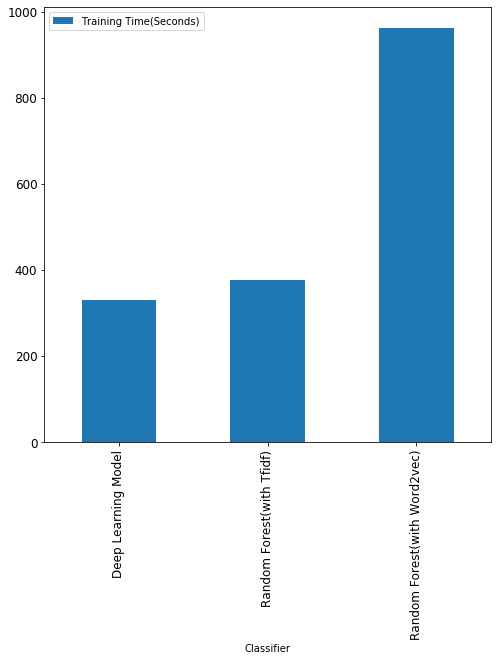

In [64]:
trainingtime.plot.bar(x='Classifier',y=['Training Time(Seconds)'],figsize=(8,8), legend=True, fontsize=12)

In [65]:
testing_acc = testing_acc.sort_values(by=['Testing accuracy(percent)'])
testing_acc.index = testing_acc.index + 1
testing_acc

,Classifier,Testing accuracy(percent)
1,Random Forest(with Tfidf),83.800000
2,Random Forest(with Word2vec),84.175000
3,Deep Learning Model,88.174999


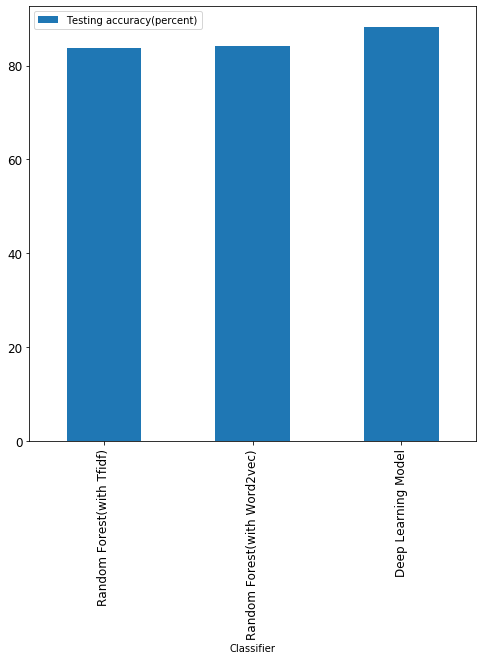

In [66]:
testing_acc.plot.bar(x='Classifier',y=['Testing accuracy(percent)'],figsize=(8,8), legend=True, fontsize=12)